In [20]:

import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path="student-mat.csv"

import urllib.request
import zipfile

urllib.request.urlretrieve(url,"student.zip")
with zipfile.ZipFile("student.zip","r") as zip_ref:
    zip_ref.extractall(".")

#load data
df=pd.read_csv("student-mat.csv",sep=";")
print("data loaded ")
    
    

data loaded 


In [18]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


2. Data Exploration


In [22]:

# Check for missing values
df.isnull().sum()

# Display column data types
df.dtypes

# Check dataset shape
df.shape

(395, 33)

3. Data Cleaning

In [26]:
# Drop missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

4. Data Analysis Questions


In [28]:
# 1. Average score in math (G3)
average_g3 = df["G3"].mean()
print(f"Average final grade (G3): {average_g3:.2f}")

Average final grade (G3): 10.42


In [30]:
# 2. Students scoring above 15 in G3
above_15 = df[df["G3"] > 15].shape[0]
print(f"Number of students scoring above 15: {above_15}")

Number of students scoring above 15: 40


In [34]:
# 3. Correlation between study time and G3
import numpy as np
correlation = np.corrcoef(df["studytime"], df["G3"])[0, 1]
print(f"Correlation between study time and G3: {correlation:.2f}")

Correlation between study time and G3: 0.10


In [36]:
# 4. Average final grade by gender
avg_by_gender = df.groupby("sex")["G3"].mean()
print(avg_by_gender)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


5. Data Visualization

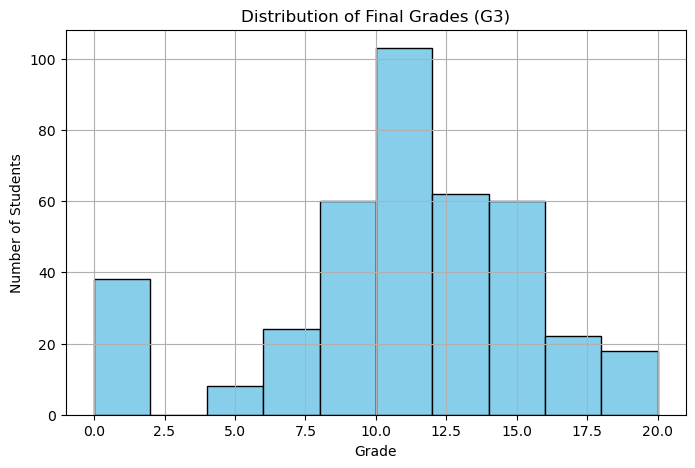

In [71]:
# 1. Histogram of final grades
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
plt.hist(df["G3"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

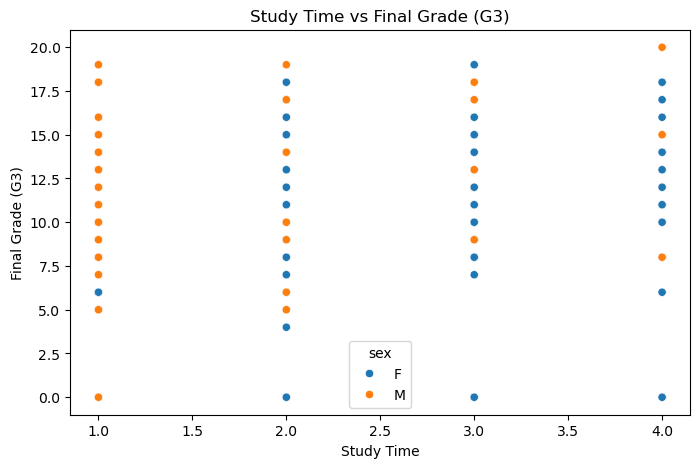

In [66]:
# 2. Scatter plot between study time and final grade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="studytime", y="G3", hue="sex")
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

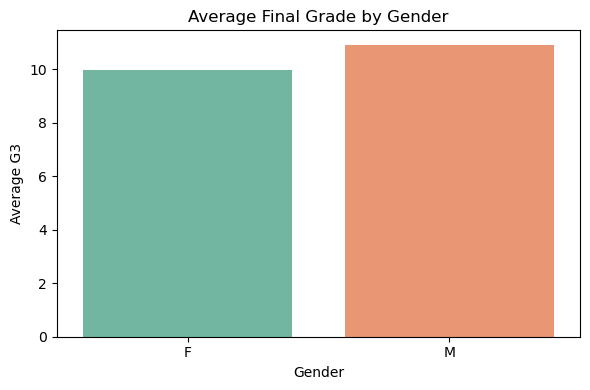

In [ ]:
# 3. Bar chart comparing average scores by gender

plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="G3", hue="sex", data=avg_g3_gender, palette="Set2", legend=False)
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.tight_layout()
plt.show()
